In [216]:
from turtle import color
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#preprocessing data
data=pd.read_csv(r'/home/harshal/Downloads/insurance.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [217]:
print(data.isnull().sum())
data=data.interpolate()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [218]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [219]:
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

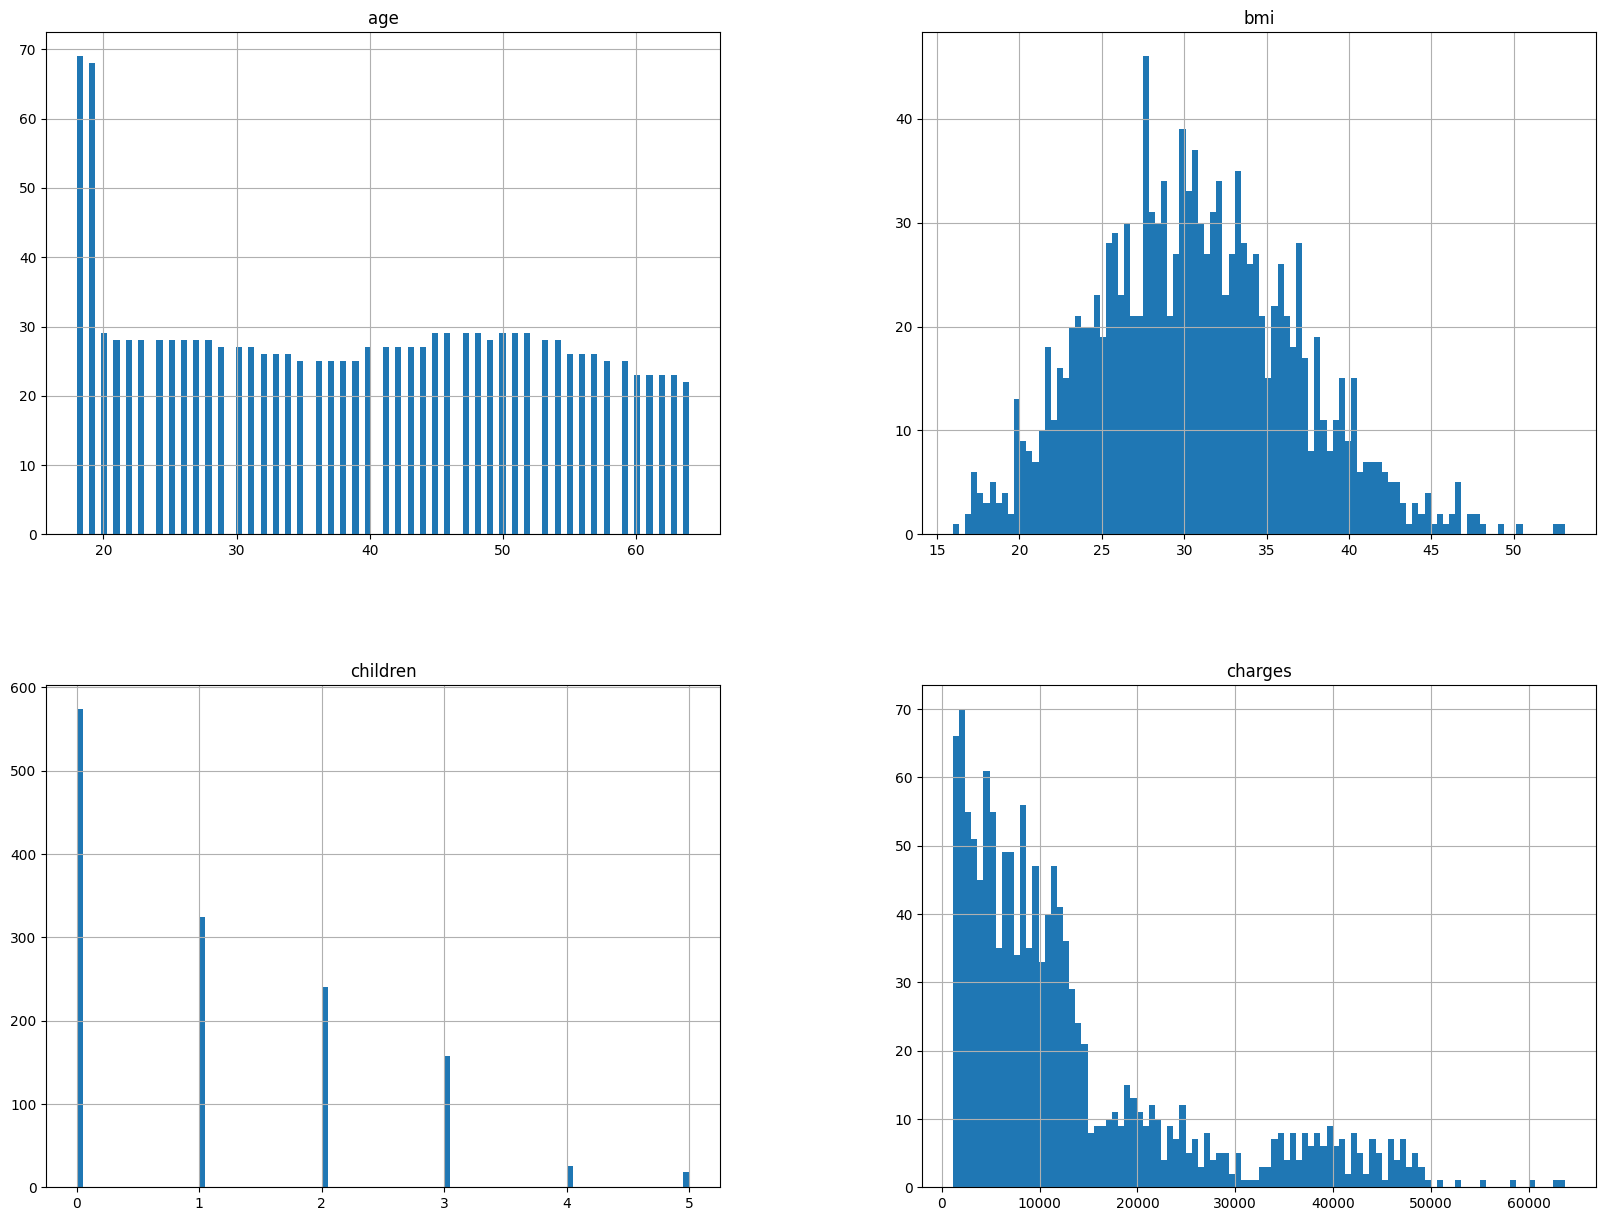

In [220]:
data.hist(bins=100,figsize=(20,15))

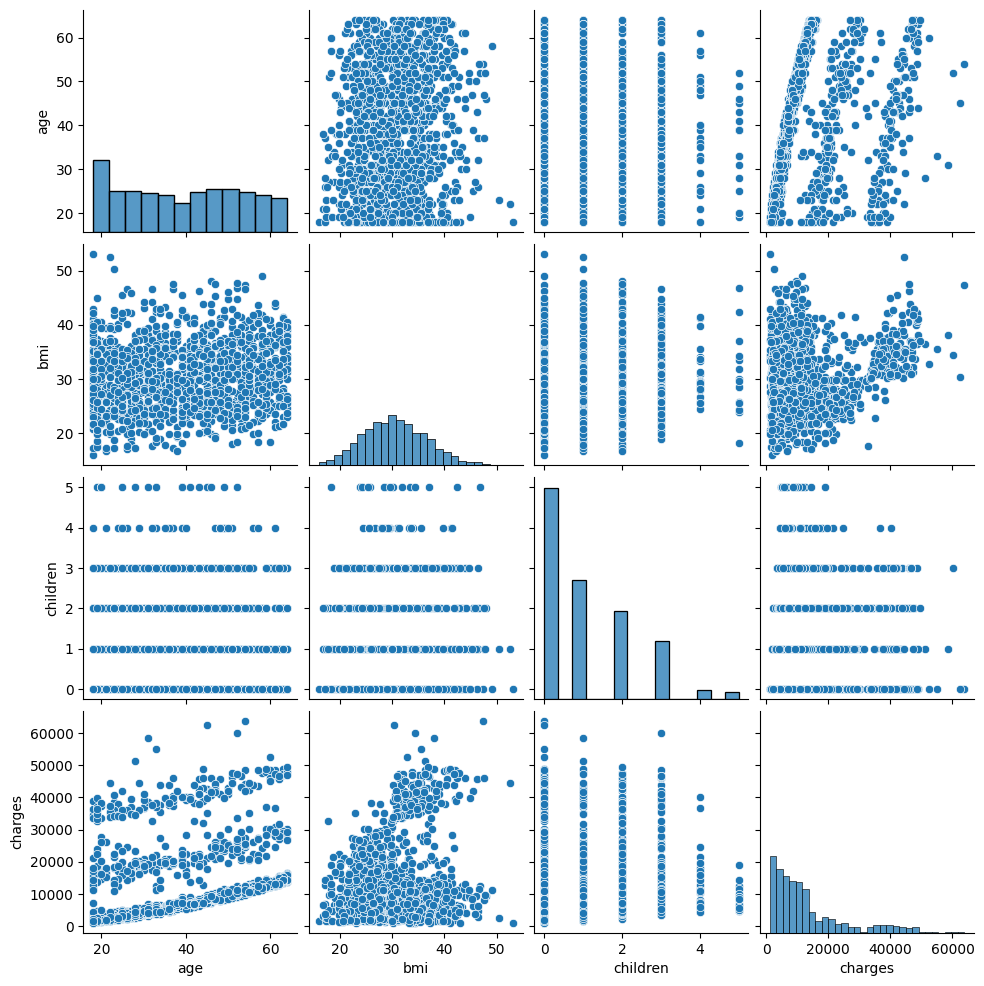

In [221]:
sns.pairplot(data)

In [222]:
dd=data.corr()
print(dd)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


/tmp/ipykernel_10488/825731663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dd=data.corr()


/tmp/ipykernel_10488/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

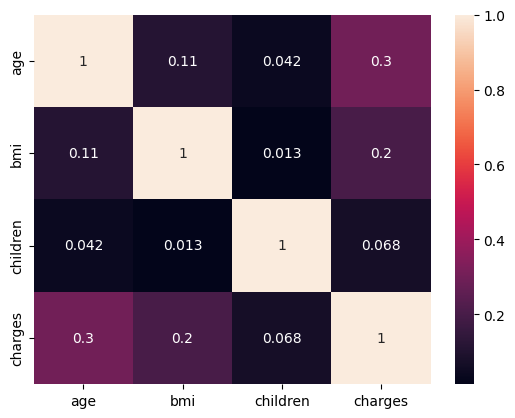

In [223]:
sns.heatmap(data.corr(),annot=True)

In [224]:
se=pd.get_dummies(data['sex'])
smo=pd.get_dummies(data['smoker'])
reg=pd.get_dummies(data['region'])
print(reg.sum())

northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


In [225]:
data=pd.concat([data,se,smo,reg],axis=1)
data=data.drop(['sex','smoker','region'],axis=1)
print(data)

      age     bmi  children      charges  female  male  no  yes  northeast  \
0      19  27.900         0  16884.92400       1     0   0    1          0   
1      18  33.770         1   1725.55230       0     1   1    0          0   
2      28  33.000         3   4449.46200       0     1   1    0          0   
3      33  22.705         0  21984.47061       0     1   1    0          0   
4      32  28.880         0   3866.85520       0     1   1    0          0   
...   ...     ...       ...          ...     ...   ...  ..  ...        ...   
1333   50  30.970         3  10600.54830       0     1   1    0          0   
1334   18  31.920         0   2205.98080       1     0   1    0          1   
1335   18  36.850         0   1629.83350       1     0   1    0          0   
1336   21  25.800         0   2007.94500       1     0   1    0          0   
1337   61  29.070         0  29141.36030       1     0   0    1          0   

      northwest  southeast  southwest  
0             0        

In [226]:
X=data.drop(['charges'],axis=1)
y=data['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<AxesSubplot: >

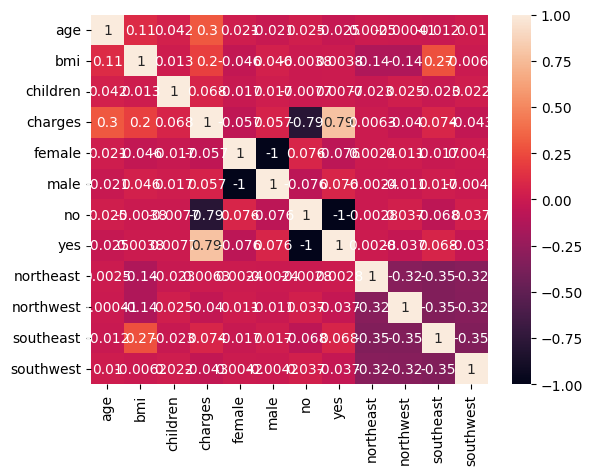

In [227]:
sns.heatmap(data.corr(),annot=True)

In [228]:
from sklearn.linear_model import LinearRegression
mlin=LinearRegression()
mlin.fit(X_train,y_train)
data=data.drop(columns=['children','northwest','southwest','age','bmi'],axis=1)
print(data)

          charges  female  male  no  yes  northeast  southeast
0     16884.92400       1     0   0    1          0          0
1      1725.55230       0     1   1    0          0          1
2      4449.46200       0     1   1    0          0          1
3     21984.47061       0     1   1    0          0          0
4      3866.85520       0     1   1    0          0          0
...           ...     ...   ...  ..  ...        ...        ...
1333  10600.54830       0     1   1    0          0          0
1334   2205.98080       1     0   1    0          1          0
1335   1629.83350       1     0   1    0          0          1
1336   2007.94500       1     0   1    0          0          0
1337  29141.36030       1     0   0    1          0          0

[1338 rows x 7 columns]


In [251]:
y_pred_test=mlin.predict(X_test)
y_pred_train=mlin.predict(X_train)

In [252]:
print(y_pred_train.shape)
print(y_pred_test.shape)
print(y_test.shape)
print(y_train.shape)

(1070,)
(268,)
(268,)
(1070,)


In [242]:
def gradient(x,y):
     m=(((mean(x)*mean(y)-mean(x*y))/(mean(x)*mean(y)-mean(x*x))))
     b=mean(y)-m*mean(x)
     return m,b        
m1,b1=gradient(y_test,y_pred_test)
print(m1,b1)

0.7513114604111971 3158.607495548189


(0.0, 4000.0)

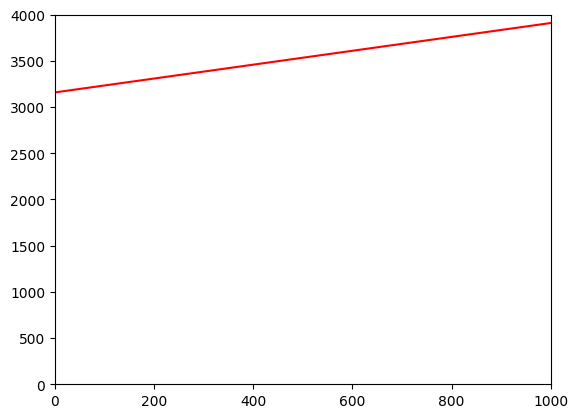

In [255]:
plt.scatter(y_test,y_pred_test,s=0.1)
plt.plot([m1*x1+b1 for x1 in range(1338)], color='red')
plt.xlim(0,1000)
plt.ylim(0,4000)

In [248]:
print(r2_score(y_test,y_pred_test))

0.7999876970680435
